In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

As I was taking a handful of vitamins, I started wondering if it's one too many. So, I downloaded the NHNES survey data (which surveys the respondents and also takes their medical measurements), and looked into the section of supplement and vitamin intake. The survey administrators do this on site, respectively, in people's houses where they check each bottle the respondent mentions for the size and volume, and daily value.
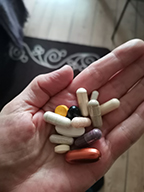

In [2]:
# National Health and Nutrition Examination Survey https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/DSQTOT_J.htm#DSD010
# Merged with demographics file https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/DEMO_J.htm
df = pd.read_csv('C:\\Users\\thesk\\eclipse-workspace\\NHNES\\Vitamins_suppls.csv')

In [3]:
df.head(3)

,SEQN,Count_supp,Count_antacids,Any_supp,Any_antiacids,KCAL,PROT,CARB,SUGR,FIBR,...,FMSIZE,HHchild0_5,HHchild6_17,HHadults60_older,HHRAGZ,HHRMAZ,HHSEDZ,HHINC,FINC,Ratio_FtoPov
0,99349,8,1,1,1,20,,,,,...,7,1,2,1,3,1,2,14,14,2.56
1,101211,6,0,1,2,,,,,,...,2,0,0,1,4,2,,15,15,5
2,95113,4,0,1,2,72,,4,,,...,4,0,1,0,3,1,,14,14,3.25


In [4]:
df.dtypes

SEQN               int64
Count_supp         int64
Count_antacids     int64
Any_supp           int64
Any_antiacids      int64
                   ...  
HHRMAZ            object
HHSEDZ            object
HHINC             object
FINC              object
Ratio_FtoPov      object
Length: 67, dtype: object

In [5]:
df.HHINC.describe()

count     9254
unique      15
top         15
freq      1624
Name: HHINC, dtype: object

In [6]:
df.HHINC.replace(np.NaN, np.median)
df.head(3)

,SEQN,Count_supp,Count_antacids,Any_supp,Any_antiacids,KCAL,PROT,CARB,SUGR,FIBR,...,FMSIZE,HHchild0_5,HHchild6_17,HHadults60_older,HHRAGZ,HHRMAZ,HHSEDZ,HHINC,FINC,Ratio_FtoPov
0,99349,8,1,1,1,20,,,,,...,7,1,2,1,3,1,2,14,14,2.56
1,101211,6,0,1,2,,,,,,...,2,0,0,1,4,2,,15,15,5
2,95113,4,0,1,2,72,,4,,,...,4,0,1,0,3,1,,14,14,3.25


In [7]:
cols = df.columns[df.dtypes.eq('object')]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [8]:
# Create smaller df for specific types
df_macro = df[['PROT','CARB','SUGR','FIBR','TFAT','TSFAT','TMFAT','TPFAT','CHOL']]  #KCAL removed
df_vitamins = df[['LYCO','B1','B2','NIAC','B6','FA','FDFE','TCHL','B12','C','K','D']] #LZ removed due to large values
df_minerals = df[['CALC','PHOS','MAGN','IRON','ZINC','COPP','SODI','POTA','SELE','CAFF','IODI']]

Text(0, 0.5, 'Median value in mg/mcg')

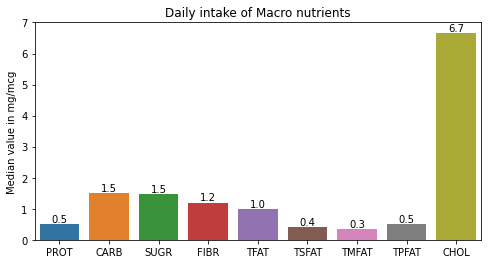

In [17]:
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=df_macro, ci = None, estimator = np.median)
ax.set_title("Daily intake of Macro nutrients")
plt.bar_label(ax.containers[0], fmt=('%.1f'))
plt.ylabel("Median value in mg/mcg", size=10)

Text(0, 0.5, 'Median value in mg/mcg')

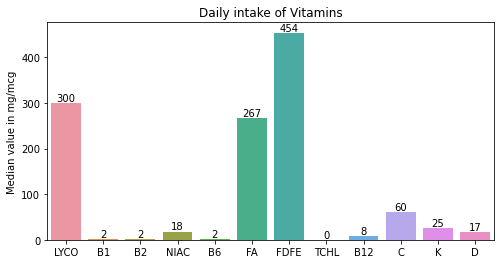

In [18]:
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=df_vitamins, ci = None, estimator = np.median)    # ci=none removes error bars
ax.set_title("Daily intake of Vitamins")
plt.bar_label(ax.containers[0], fmt=('%.0f'))
plt.ylabel("Median value in mg/mcg", size=10)

<b>Daily recommended values:</b><br>
NIAC(B3) F:14mg, M:16mg<br>
B6 1.3mg<br>
Folic Acid: 400mcg<br>
Choline(B complex): F:425mg, M:550mg<br>
C F:75mg, M:90mg<br>
D 15mg<br>

Text(0, 0.5, 'Median value in mg/mcg')

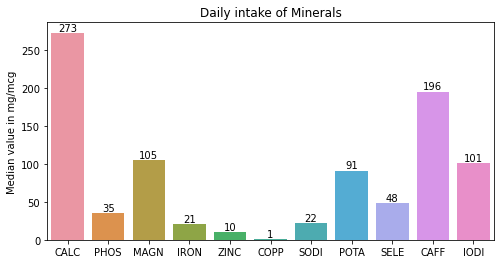

In [19]:
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=df_minerals, ci = None)                              
ax.set_title("Daily intake of Minerals")
plt.bar_label(ax.containers[0], fmt=('%.0f'))
plt.ylabel("Median value in mg/mcg", size=10)

<b>Daily recommended values:</b><br>
Calcium 1000mg<br>
Magnesium F:320mg, M: 420mg<br>
Phosphorus 700mg<br>
Iron F:18mg, M:8mg<br>
Copper 0.9mg<br>
Sodium 15g<br>
Potassium 34g<br>
Selenium 55mg<br>
Caffeine 400mg<br>
Iodine 150mcg<br>

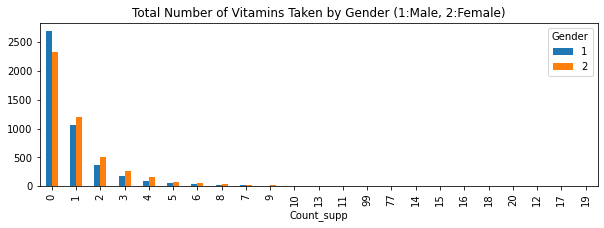

In [12]:
tab = pd.crosstab(df['Count_supp'], df['Gender'],margins=True).sort_values('All',ascending=False)
tab = tab.drop('All',axis=1)
tab = tab.drop('All',axis=0)
tab.plot(kind='bar', stacked=False,figsize=(10,3)).set_title("Total Number of Vitamins Taken by Gender (1:Male, 2:Female)")
plt.show()

This was just a short personal project. I checked my data against the medians of other consumers and concluded that I am not in a danger zone.<br>
Future research ideas: a) statistically significant differences in vitamin intake by income level, b) by education, c) an online interactive plot to be able to enter the user's data and it shows the corresponding percentile, e.g. the user takes a 1 mg vitamin B pill, he would show as the 75th percentile of the population.